Chapter 09

# 完全型QR分解
《线性代数》 | 鸢尾花书：数学不难

这段代码从数学角度完整演示了**完全型 QR 分解（Complete QR Decomposition）**的结构性质与正交矩阵的基本性质，并借助热图可视化每一个关键矩阵的结构特征。

---

首先，代码生成一个形状为 $12 \times 8$ 的随机实矩阵 $A$，即：
$$
A \in \mathbb{R}^{12 \times 8}
$$
这意味着矩阵 $A$ 有 12 行、8 列，是一个列满秩的“高瘦型”矩阵。

然后，执行 **完全型 QR 分解**：
$$
A = Q_c R_c
$$
其中：

- $Q_c \in \mathbb{R}^{12 \times 12}$ 是一个 **正交矩阵**，即满足：
  $$
  Q_c^T Q_c = Q_c Q_c^T = I_{12}
  $$
  它的前8列构成 $A$ 的列空间的一个正交基，其后4列构成其正交补（列空间的补空间），所以 $Q_c$ 是在标准 QR 分解基础上通过补全列向量而获得的 **完整正交矩阵**。

- $R_c \in \mathbb{R}^{12 \times 8}$ 是一个 **上三角矩阵**扩展为 $12$ 行的形式，只有前 $8$ 行是非零的上三角结构，下面是 $4$ 行全零。

因此，$Q_c R_c$ 实现了对矩阵 $A$ 的完全型 QR 分解，不仅满足 $A = Q_c R_c$，而且使得 $Q_c$ 具备完备的正交基结构。

---

接下来代码对这些矩阵进行可视化：

- 第一组图像展示了等式：
  $$
  A = Q_c R_c
  $$
  利用热图（Heatmap）显示矩阵 $A$、$Q_c$ 和 $R_c$ 的结构，从图像中我们可以看到 $Q_c$ 明显拥有正交结构（行列之间的颜色分布非常均衡），$R_c$ 具有明显的上三角特征（上半部分有颜色，下半部分接近零）。

---

第二部分是验证 $Q_c$ 的正交性。

首先可视化：
$$
Q_c^T Q_c = I
$$
这表明矩阵 $Q_c$ 的列向量是单位正交的，即两两正交且每个向量范数为 $1$，这也是正交矩阵的核心定义。热图显示主对角线为红色（代表 $1$），其他元素为蓝色或白色（接近 $0$），正是单位矩阵的结构。

然后反转顺序，再次验证：
$$
Q_c Q_c^T = I
$$
这进一步验证 $Q_c$ 的**行向量**也是单位正交的，说明 $Q_c$ 作为一个正交矩阵，其左乘和右乘均保持向量长度和角度不变。

---

整体来看，这段代码以图像方式清晰展示了：

1. 完全型 QR 分解如何将任意矩阵分解为一个正交矩阵与一个上三角矩阵的乘积；
2. 正交矩阵 $Q_c$ 的基本性质（左右乘转置都为单位矩阵）；
3. 利用热图可视化帮助理解矩阵结构 —— 如正交矩阵的对称、稀疏、分布均匀等性质。

## 初始化

In [4]:
import numpy as np  # 导入数值计算库
import seaborn as sns  # 导入数据可视化库
from matplotlib import pyplot as plt  # 导入绘图库

## 生成矩阵A

In [6]:
np.random.seed(88888)
A = np.random.randn(12, 8)

## 完全型QR分解

In [8]:
Q_complete, R_complete = np.linalg.qr(A, mode='complete')

## 可视化

Text(0.5, 1.0, 'Rc')

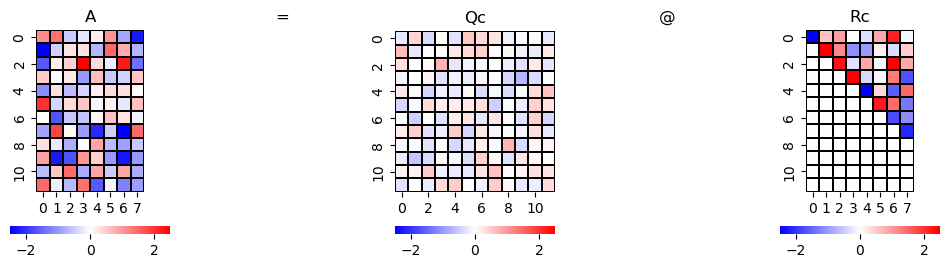

In [10]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3))  # 创建子图

plt.sca(axs[0])
ax = sns.heatmap(A, cmap='bwr', vmax=2.5, vmin=-2.5,  # 绘制矩阵 X 的热图
                 linecolor = 'k',linewidths = 0.1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('A')

plt.sca(axs[1])
plt.title('=')  # 绘制等号
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(Q_complete, cmap='bwr', vmax=2.5, vmin=-2.5,  # 绘制完整正交矩阵 Qc 的热图
                 linecolor = 'k',linewidths = 0.1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('Qc')

plt.sca(axs[3])
plt.title('@')  # 绘制乘号
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(R_complete, cmap='bwr', vmax=2.5, vmin=-2.5,  # 绘制上三角矩阵 Rc 的热图
                 linecolor = 'k',linewidths = 0.1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('Rc')

## Q为正交矩阵

Text(0.5, 1.0, 'Qc')

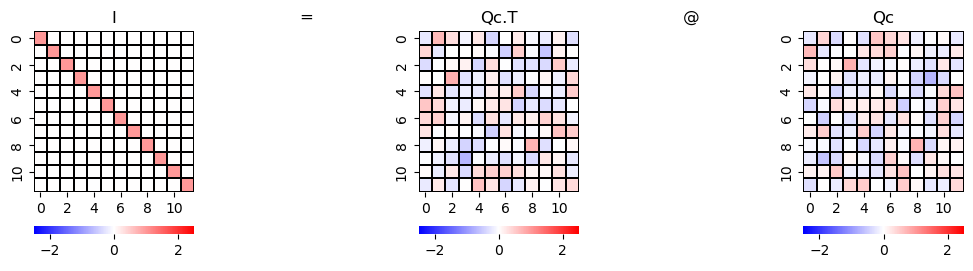

In [12]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3))  # 创建子图

plt.sca(axs[0])
ax = sns.heatmap(Q_complete.T @ Q_complete, cmap='bwr', vmax=2.5, vmin=-2.5,  # 绘制 Qc.T @ Qc 的热图
                 linecolor = 'k',linewidths = 0.1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('I')

plt.sca(axs[1])
plt.title('=')  # 绘制等号
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(Q_complete.T, cmap='bwr', vmax=2.5, vmin=-2.5,  # 绘制 Qc.T 的热图
                 linecolor = 'k',linewidths = 0.1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('Qc.T')

plt.sca(axs[3])
plt.title('@')  # 绘制乘号
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(Q_complete, cmap='bwr', vmax=2.5, vmin=-2.5,  # 绘制 Qc 的热图
                 linecolor = 'k',linewidths = 0.1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('Qc')

Text(0.5, 1.0, 'Qc.T')

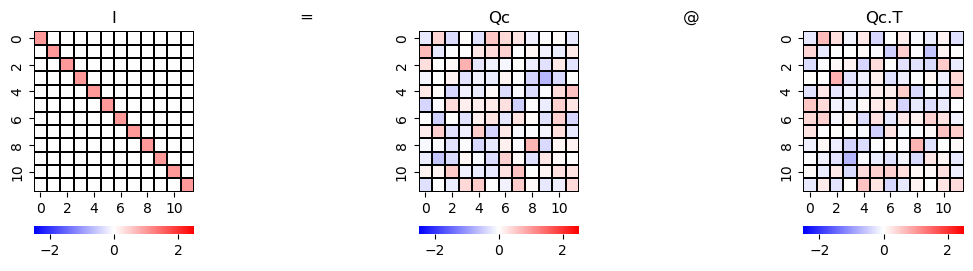

In [13]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3))  # 创建子图

plt.sca(axs[0])
ax = sns.heatmap(Q_complete @ Q_complete.T, cmap='bwr', vmax=2.5, vmin=-2.5,  # 绘制 Qc.T @ Qc 的热图
                 linecolor = 'k',linewidths = 0.1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('I')

plt.sca(axs[1])
plt.title('=')  # 绘制等号
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(Q_complete, cmap='bwr', vmax=2.5, vmin=-2.5,  # 绘制 Qc.T 的热图
                 linecolor = 'k',linewidths = 0.1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('Qc')

plt.sca(axs[3])
plt.title('@')  # 绘制乘号
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(Q_complete.T, cmap='bwr', vmax=2.5, vmin=-2.5,  # 绘制 Qc 的热图
                 linecolor = 'k',linewidths = 0.1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('Qc.T')

作者	**生姜DrGinger**  
脚本	**生姜DrGinger**  
视频	**崔崔CuiCui**  
开源资源	[**GitHub**](https://github.com/Visualize-ML)  
平台	[**油管**](https://www.youtube.com/@DrGinger_Jiang)		
		[**iris小课堂**](https://space.bilibili.com/3546865719052873)		
		[**生姜DrGinger**](https://space.bilibili.com/513194466)  ·